In [ ]:
!pip install GoogleNews
!pip install --upgrade GoogleNews
!pip install dateparser
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

Requirement already up-to-date: GoogleNews in /usr/local/lib/python3.6/dist-packages (1.4.0)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
import re
from datetime import datetime, timedelta
import numpy as np
googlenews = GoogleNews()

In [ ]:
def ne(lan,inicio,final,pesquisa):
    GoogleNews(lan)
    GoogleNews(start=inicio)
    googlenews.search(pesquisa)
    googlenews.getpage(1)
    return(googlenews.result())
    googlenews.clear()

In [ ]:
dados=pd.DataFrame(ne('en','01/01/2008','01/08/2020','Bitcoin'))
len(dados)

24

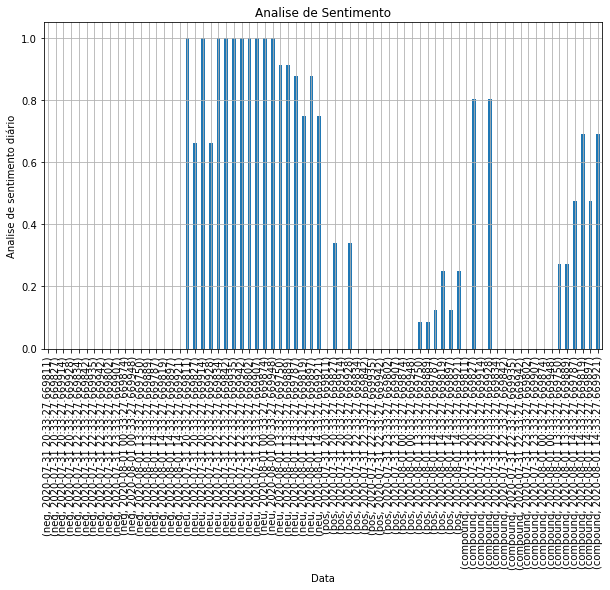

In [ ]:
temp = dados['date']
tit =  dados['title']
info = dados['desc']
t=temp.tolist()

def convert_datetime(datetime_ago):

    matches = re.search(r"(\d+ weeks?,? )?(\d+ days?,? )?(\d+ hours?,? )?(\d+ mins?,? )?(\d+ secs? )?ago", datetime_ago)
    if not matches:
        return None
    date_pieces = {'week': 0, 'day': 0, 'hour': 0, 'min': 0, 'sec': 0}
    for i in range(1, len(date_pieces) + 1):
        if matches.group(i):
            value_unit = matches.group(i).rstrip(', ')
            if len(value_unit.split()) == 2:
                value, unit = value_unit.split()
                date_pieces[unit.rstrip('s')] = int(value)

    d = datetime.today() - timedelta(
        weeks=date_pieces['week'],
        days=date_pieces['day'],
        hours=date_pieces['hour'],
        minutes=date_pieces['min'],
        seconds=date_pieces['sec']
    )
    return d

time = t
temp=[]
i = 0
while i < len(time):
    temp.append(convert_datetime(time[i]))
    i = i + 1

temp=pd.DataFrame(temp)
data = pd.concat((temp,tit,info), axis=1)
data.sort_values(by=0,ascending = False)

vader = SentimentIntensityAnalyzer()
scores = data['desc'].apply(vader.polarity_scores).tolist()
sco=pd.DataFrame(scores)
neg=sco['neg'] 
neu=sco['neu']
pos=sco['pos']
result=sco['compound']
dados = pd.concat((temp,tit,info,neg,neu,pos,result), axis=1)
dados.to_csv(r'dados_an.csv', index = False)

plt.rcParams['figure.figsize'] = [10, 6]
mean_scores = dados.groupby([0]).mean()
mean_scores = mean_scores.unstack()
mean_scores.plot(kind ='bar')
plt.title('Analise de Sentimento')
plt.xlabel('Data')
plt.ylabel('Analise de sentimento diário')
plt.grid()

In [ ]:
dados

,0,title,desc,neg,neu,pos,compound
0,2020-08-01 13:33:27.669750,"Bitcoin Now ‘Perfectly on Track’ to $100K, Say...","The price of Bitcoin surpassed $11700, and the...",0.0,0.913,0.087,0.2732
1,2020-08-01 14:33:27.669787,Nearly $100 Million in Bitcoin Moved to Ethere...,Ethereum is still the most popular off-chain d...,0.0,0.877,0.123,0.4754
2,NaT,,,0.0,0.000,0.000,0.0000
3,NaT,,,0.0,0.000,0.000,0.0000
4,NaT,,,0.0,0.000,0.000,0.0000
5,2020-07-31 23:33:27.669802,Bitcoin FOMO Is Back,Bitcoin's price surge has triggered a retail t...,0.0,1.000,0.000,0.0000
6,2020-07-31 20:33:27.669811,$1.2B Bitcoin Futures and Options Contracts Ju...,billion in Bitcoin futures and options expired...,0.0,1.000,0.000,0.0000
7,2020-08-01 14:33:27.669819,Why This Sex Industry Executive Loves Bitcoin ...,We accept 20 different cryptocurrencies for to...,0.0,0.749,0.251,0.6901
8,2020-07-31 20:33:27.669827,Bloomberg: Americans Trade Depreciating Dollar...,A Bloomberg article claims that Americans are ...,0.0,0.661,0.339,0.8039
9,2020-07-31 22:33:27.669834,"3 charged, including 17-year-old Florida boy, ...","MIAMI (AP) — A British man, a Florida man and ...",0.0,1.000,0.000,0.0000
